In [1]:
import pandas as pd
df = pd.read_csv('data/score.csv', index_col='지원번호')

import matplotlib.pyplot as plt
#한글설정
plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False)

In [2]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,NaN
5번,강백호,북산고,188,15,20,10,35,10,NaN
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,능남고,188,55,65,45,40,35,PYTHON
8번,윤대협,능남고,190,100,85,90,95,95,C#


In [5]:
df.loc['7번', '학교'] = '남능고'
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,산북고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,NaN
5번,강백호,북산고,188,15,20,10,35,10,NaN
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,남능고,188,55,65,45,40,35,PYTHON
8번,윤대협,능남고,190,100,85,90,95,95,C#


In [8]:
group=df.groupby('학교')['키'].mean()
group

학교
남능고    188.0
능남고    196.0
북산고    189.0
산북고    168.0
Name: 키, dtype: float64

In [9]:
shcool = group.index
height = group.values
shcool, height

(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([188., 196., 189., 168.]))

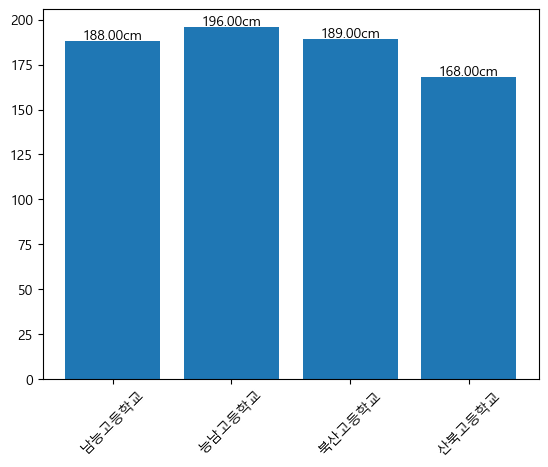

In [16]:
plt.bar(shcool, height)
for idx, h in enumerate(height):
    plt.text(idx, h+1, f'{h:.2f}cm', ha='center')
plt.xticks(shcool, [s+'등학교' for s in shcool], rotation=45)
plt.show()

In [17]:
#학교별 학생수를 막대그래프로 출력
group = df.groupby('학교').size()
group

학교
남능고    1
능남고    2
북산고    4
산북고    1
dtype: int64

In [19]:
school = group.index
count = group.values

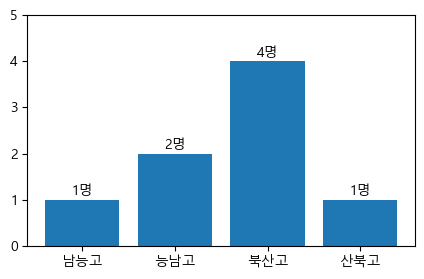

In [28]:
plt.figure(figsize=(5, 3))
plt.bar(school, count)
for idx, c in enumerate(count):
    plt.text(idx, c+0.1, f'{c}명', ha='center')
plt.ylim(0, 5)
plt.show()

In [35]:
df['SW특기'] = df['SW특기'].str.capitalize()
df.fillna({'SW특기':'없음'}, inplace=True)
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,산북고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,없음
5번,강백호,북산고,188,15,20,10,35,10,없음
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,남능고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#


In [38]:
group = df.groupby('SW특기').size()

In [39]:
sw = group.index
count = group.values
sw, count

(Index(['C', 'C#', 'Java', 'Javascript', 'Python', '없음'], dtype='object', name='SW특기'),
 array([1, 1, 1, 1, 2, 2]))

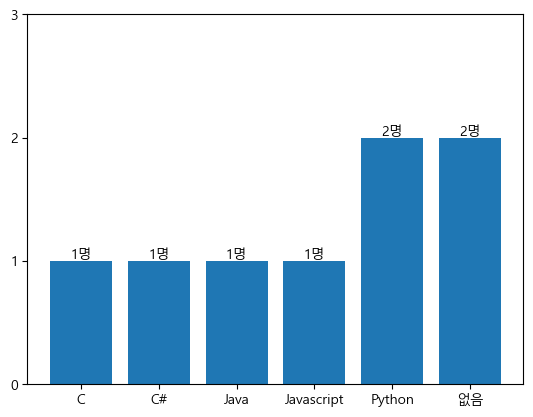

In [46]:
plt.bar(sw, count)
for idx, c in enumerate(count):
    plt.text(idx, c+0.02, f'{c}명', ha='center')
plt.ylim(0, max(count)+1)
plt.yticks([y for y in range(0, max(count)+2, 1)])
plt.show()

In [49]:
#학교별 평균점수를 막대그래프로 출력

df['평균'] = df.apply(lambda row: row['국어':'사회'].mean(), axis=1)
group = df.groupby('학교')['평균'].mean()
group

학교
남능고    48.00
능남고    90.50
북산고    53.75
산북고    76.00
Name: 평균, dtype: float64

In [50]:
school = group.index
avg = group.values

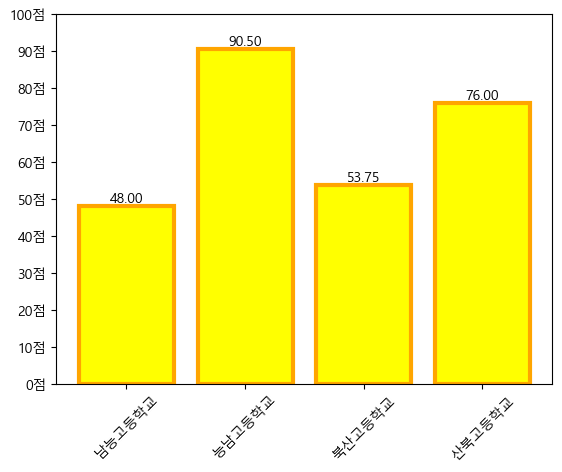

In [69]:
plt.bar(school, avg, color='yellow', ec='orange', lw=3)
for idx, a in enumerate(avg):
    plt.text(idx, a+1, f'{a:.2f}', ha='center')
plt.ylim(0, 100)
yticks=[y for y in range(0, 101, 10)]
plt.yticks(yticks, [f'{y}점' for y in yticks])
plt.xticks(shcool, [s+'등학교' for s in shcool], rotation=45)
plt.show()